In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
df = yf.download('AAPL', start='2012-02-01',  end='2024-01-07').drop(['Adj Close'], axis=1)

start = '2013-01-01'
end = '2023-12-31'

df = df[start:end]

[*********************100%%**********************]  1 of 1 completed


In [3]:
def plot_flow_bar(data, lookback_bars, validation_bars, testing_bars):

    ranges = list(range(lookback_bars, len(data) - testing_bars, validation_bars))

    fig, ax = plt.subplots()
    fig.set_figwidth(12)

    train_data = pd.DataFrame()
    val_data = pd.DataFrame()
    test_data = pd.DataFrame()
    for i in range(0,len(ranges)): #len(ranges)
        training_data = data[ranges[i]-lookback_bars:ranges[i]]
        validation_data = data[ranges[i]:ranges[i]+validation_bars]
        testing_data = data[ranges[i]+validation_bars:ranges[i]+validation_bars+testing_bars]

        plt.fill_between(training_data.index,
                         [len(ranges) -i - 0.5]*len(training_data.index),
                         [len(ranges) -i + 0.5]*len(training_data.index),
                        color ="green", edgecolor = "black", linewidth =0.5
                        )

        plt.fill_between(validation_data.index,
                         [len(ranges) -i - 0.5]*len(validation_data.index),
                         [len(ranges) -i + 0.5]*len(validation_data.index),
                        color ="yellow", edgecolor = "black", linewidth=0.5
                        )
        
        plt.fill_between(testing_data.index,
                         [len(ranges) -i - 0.5]*len(testing_data.index),
                         [len(ranges) -i + 0.5]*len(testing_data.index),
                        color ="red", edgecolor = "black", linewidth=0.5
                        )
        
        plt.fill_between(data.index[(lookback_bars+validation_bars):],
                        [0.5]*(len(data.index[(lookback_bars+validation_bars):])),
                        [-0.5]*(len(data.index[(lookback_bars+validation_bars):])),
                        color ="darkred", edgecolor = "black", linewidth=0.5
                        )
        
        train_data = pd.concat([train_data, training_data])
        val_data = pd.concat([val_data, validation_data])
        test_data = pd.concat([test_data, testing_data])
        
    plt.show()
    return train_data, val_data, test_data

In [4]:
data = df
lookback_bars = 250
validation_bars = 75
testing_bars = 75

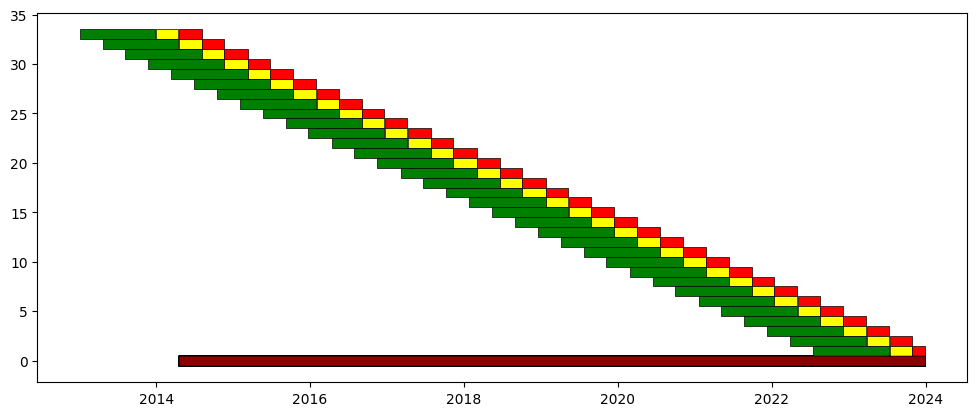

In [5]:
train_data, val_data, test_data = plot_flow_bar(data,lookback_bars,validation_bars,testing_bars)